In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


LOADING AND DISPLAYING THE DATASETS

In [2]:
# Loading the datasets
project_data = pd.read_csv('/Users/ifunanyaakpoveta/Downloads/AbbVie dataset/Project_Level_Data - Project_Level_Data.csv')
gene_drug_data = pd.read_csv('/Users/ifunanyaakpoveta/Downloads/AbbVie dataset/Gene_Drug_Adverse_Event_Relationships - Gene_Drug_Adverse_Event_Relationships.csv')
compound_activity_data = pd.read_csv('/Users/ifunanyaakpoveta/Downloads/AbbVie dataset/Compound_Off_Target_Activity - Compound_Off_Target_Activity.csv')


In [3]:
# Displaying the first few rows of each dataset to understand their structure

print("\nCompound Off Target Activity:")
compound_activity_data.shape



Compound Off Target Activity:


(26358, 3)

In [4]:
compound_activity_data.head()

,CompoundID,Gene Target,pIC50
0,CM-212452,Abl,5.50
1,CM-212452,ACVR1,5.33
2,CM-212452,Akt1,5.39
3,CM-212452,ALK,5.32
4,CM-212452,Aurora1,5.26


In [5]:
print("Project Level Data:")
project_data.head()


Project Level Data:


,CompoundID,Primary_Target_Assay,Primary_Target_Assay_BioActivity,MW,Molecular_Weight,TPSA,ClogP,LogD,Num_H_Donors,Num_H_Acceptors,Num_AromaticRings,F_SP3,Drug_Class,Cell Permeability,Cmpd Solubility (uM),fafg (Rat),Bioavailability (Rat),"Clint,mic (L/hr/kg) (Rat)"
0,CM-1622017,JAK1 EC50(uM),0.259,389.45,NaN,79.59,3.586,3.5863,1,7,3.0,0.36364,UNKNOWN,41.7,86.7,NaN,NaN,3.24
1,CM-1749952,JAK1 EC50(uM),0.312,461.99,NaN,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN
2,CM-1749952,JAK1 EC50(uM),0.312,461.99,NaN,89.36,2.132,1.3643,2,9,2.0,0.68182,UNKNOWN,NaN,NaN,NaN,NaN,NaN
3,CM-1749702,JAK1 EC50(uM),3.000,386.49,NaN,97.12,1.995,1.9948,3,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN
4,CM-1749701,JAK1 EC50(uM),3.000,385.51,NaN,80.13,2.524,1.7222,2,8,2.0,0.65000,UNKNOWN,NaN,NaN,NaN,NaN,NaN


In [6]:
project_data.shape

(2452, 18)

In [7]:

print("\nGene Drug Adverse Event Relationships:")
gene_drug_data.head()


Gene Drug Adverse Event Relationships:


,GeneSymbol,Ensembl ID,EntrezGene,ae,thresholdset,gene_count,drug_count,ae_count,drugs_with_ae,bioactive_drugs
0,CSF1R,ENSG00000182578,NaN,Platelet count abnormal,11,3175,4905,2381,53,144
1,CSF1R,ENSG00000182578,NaN,Urine output decreased,11,3175,4905,2381,137,144
2,CSF1R,ENSG00000182578,NaN,Thermal burn,11,3175,4905,2381,113,144
3,CSF1R,ENSG00000182578,NaN,Oliguria,11,3175,4905,2381,246,144
4,CSF1R,ENSG00000182578,NaN,Hypercholesterolaemia,11,3175,4905,2381,352,144


In [8]:
gene_drug_data.shape

(19449, 10)

# DATA INTEGRATION

**The Datasets Are Merged To Explore The Relationships Between The Variables**

In [9]:
# Rename 'Gene Target' to 'GeneSymbol' in the compound_off_target_activity for consistency in merging
compound_activity_data.rename(columns={'Gene Target': 'GeneSymbol'}, inplace=True)

# Merge compound_off_target_activity with project_level_data on CompoundID
merged_data = pd.merge(compound_activity_data, project_data, on='CompoundID', how='inner')

# Merge the above result with gene_drug_adverse_event_relationships on Gene
final_merged_data = pd.merge(merged_data, gene_drug_data, on='GeneSymbol', how='inner')

# Display the first few rows of the final merged data to check the result
final_merged_data.head()



,CompoundID,GeneSymbol,pIC50,Primary_Target_Assay,Primary_Target_Assay_BioActivity,MW,Molecular_Weight,TPSA,ClogP,LogD,...,"Clint,mic (L/hr/kg) (Rat)",Ensembl ID,EntrezGene,ae,thresholdset,gene_count,drug_count,ae_count,drugs_with_ae,bioactive_drugs
0,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Hepatic lesion,11,3175,4905,2381,74,102
1,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Thrombotic microangiopathy,11,3175,4905,2381,155,102
2,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Full blood count decreased,11,3175,4905,2381,97,102
3,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Gingival pain,11,3175,4905,2381,77,102
4,CM-212452,BTK,5.23,JAK1 EC50(uM),3.0,294.3,NaN,93.35,2.482,2.4436,...,NaN,ENSG00000010671,NaN,Myoclonus,11,3175,4905,2381,268,102


In [10]:
final_merged_data.shape

(6725196, 29)

# DATA CLEANING AND PREPROCESSING


**Handling Missing Values**

In [11]:
# Checking for missing values in the dataset

print("\nMissing values in Dataset:")
final_merged_data.isnull().sum()



Missing values in Dataset:


CompoundID                                0
GeneSymbol                                0
pIC50                                     0
Primary_Target_Assay                      0
Primary_Target_Assay_BioActivity          0
MW                                  5582620
Molecular_Weight                     862074
TPSA                                      0
ClogP                                     0
LogD                                   9569
Num_H_Donors                              0
Num_H_Acceptors                           0
Num_AromaticRings                         0
F_SP3                                     0
Drug_Class                           644545
Cell Permeability                    918453
Cmpd Solubility (uM)                 972150
fafg (Rat)                          6170327
Bioavailability (Rat)               5820050
Clint,mic (L/hr/kg) (Rat)           1337445
Ensembl ID                          1983715
EntrezGene                          2058288
ae                              

In [12]:
# Handling missing values

# For GeneSymbol and EntrezGene, we can drop rows with missing values
final_merged_data = final_merged_data.dropna(subset=['GeneSymbol', 'EntrezGene', 'Ensembl ID'])


# Merging 'MW' and 'Molecular_Weight' into one column 'Molecular_Weight'
final_merged_data['Molecular_Weight'] = final_merged_data['Molecular_Weight'].combine_first(final_merged_data['MW'])

# Dropping the redundant columns
final_merged_data = final_merged_data.drop(columns=['MW', 'Primary_Target_Assay'])

# Dropping columns with excessive missing values (arbitrary threshold: more than 50% missing)
threshold = len(final_merged_data.columns) * 0.5
final_merged_data = final_merged_data.dropna(thresh=threshold)

# For the remaining missing values, use mean/mode imputation based on the column type

# Mean imputation for numerical columns
for col in ['Primary_Target_Assay_BioActivity', 'LogD', 'Num_AromaticRings', 'F_SP3', 'Cell Permeability', 'Cmpd Solubility (uM)', 'fafg (Rat)', 'Bioavailability (Rat)', 'Clint,mic (L/hr/kg) (Rat)']:
    final_merged_data[col].fillna(final_merged_data[col].mean(), inplace=True)

# Mode imputation for categorical columns
for col in ['Drug_Class']:
   final_merged_data[col].fillna(final_merged_data[col].mode()[0], inplace=True)

# Removing the columns that offer no information
cleaned_merged_data = final_merged_data.drop(columns=['ae_count', 'gene_count', 'drug_count', 'thresholdset'])



In [13]:
# Verifying there are no longer missing values

print("\nMissing values in Dataset:")
cleaned_merged_data.isnull().sum()



Missing values in Dataset:


CompoundID                          0
GeneSymbol                          0
pIC50                               0
Primary_Target_Assay_BioActivity    0
Molecular_Weight                    0
TPSA                                0
ClogP                               0
LogD                                0
Num_H_Donors                        0
Num_H_Acceptors                     0
Num_AromaticRings                   0
F_SP3                               0
Drug_Class                          0
Cell Permeability                   0
Cmpd Solubility (uM)                0
fafg (Rat)                          0
Bioavailability (Rat)               0
Clint,mic (L/hr/kg) (Rat)           0
Ensembl ID                          0
EntrezGene                          0
ae                                  0
drugs_with_ae                       0
bioactive_drugs                     0
dtype: int64

**Standardization & Harmonization of Variable Names To Ensure Consistency Across the Dataset**

In [14]:
 # Standardizing column names for consistency

cleaned_merged_data.rename(columns={
    'GeneSymbol': 'Gene_Symbol', 'EntrezGene': 'Entrez_Gene',
    'ae': 'Adverse_Event', 'Ensembl ID': 'Ensembl_ID',
    'Primary_Target_Assay_BioActivity': 'Primary_BioActivity',
    'Num_H_Donors': 'Num_Hydrogen_Donors',
    'Num_H_Acceptors': 'Num_Hydrogen_Acceptors',
    'Num_AromaticRings': 'Num_Aromatic_Rings',
    'F_SP3': 'Fraction_SP3',
    'Cell Permeability': 'Cell_Permeability',
    'Cmpd Solubility (uM)': 'Compound_Solubility_uM',
    'fafg (Rat)': 'Fafg_Rat',
    'Gene Target': 'Gene_Target',
    'Bioavailability (Rat)': 'Bioavailability_Rat',
    'Clint,mic (L/hr/kg) (Rat)': 'Clint_Rat_L_hr_kg'
}, inplace=True)

cleaned_merged_data.columns = cleaned_merged_data.columns.str.lower()


# Checking the updated column names
print("\nColumn Names in Merged Dataset:")
cleaned_merged_data.columns




Column Names in Merged Dataset:


Index(['compoundid', 'gene_symbol', 'pic50', 'primary_bioactivity',
       'molecular_weight', 'tpsa', 'clogp', 'logd', 'num_hydrogen_donors',
       'num_hydrogen_acceptors', 'num_aromatic_rings', 'fraction_sp3',
       'drug_class', 'cell_permeability', 'compound_solubility_um', 'fafg_rat',
       'bioavailability_rat', 'clint_rat_l_hr_kg', 'ensembl_id', 'entrez_gene',
       'adverse_event', 'drugs_with_ae', 'bioactive_drugs'],
      dtype='object')

**Feature Selection And  Engineering**

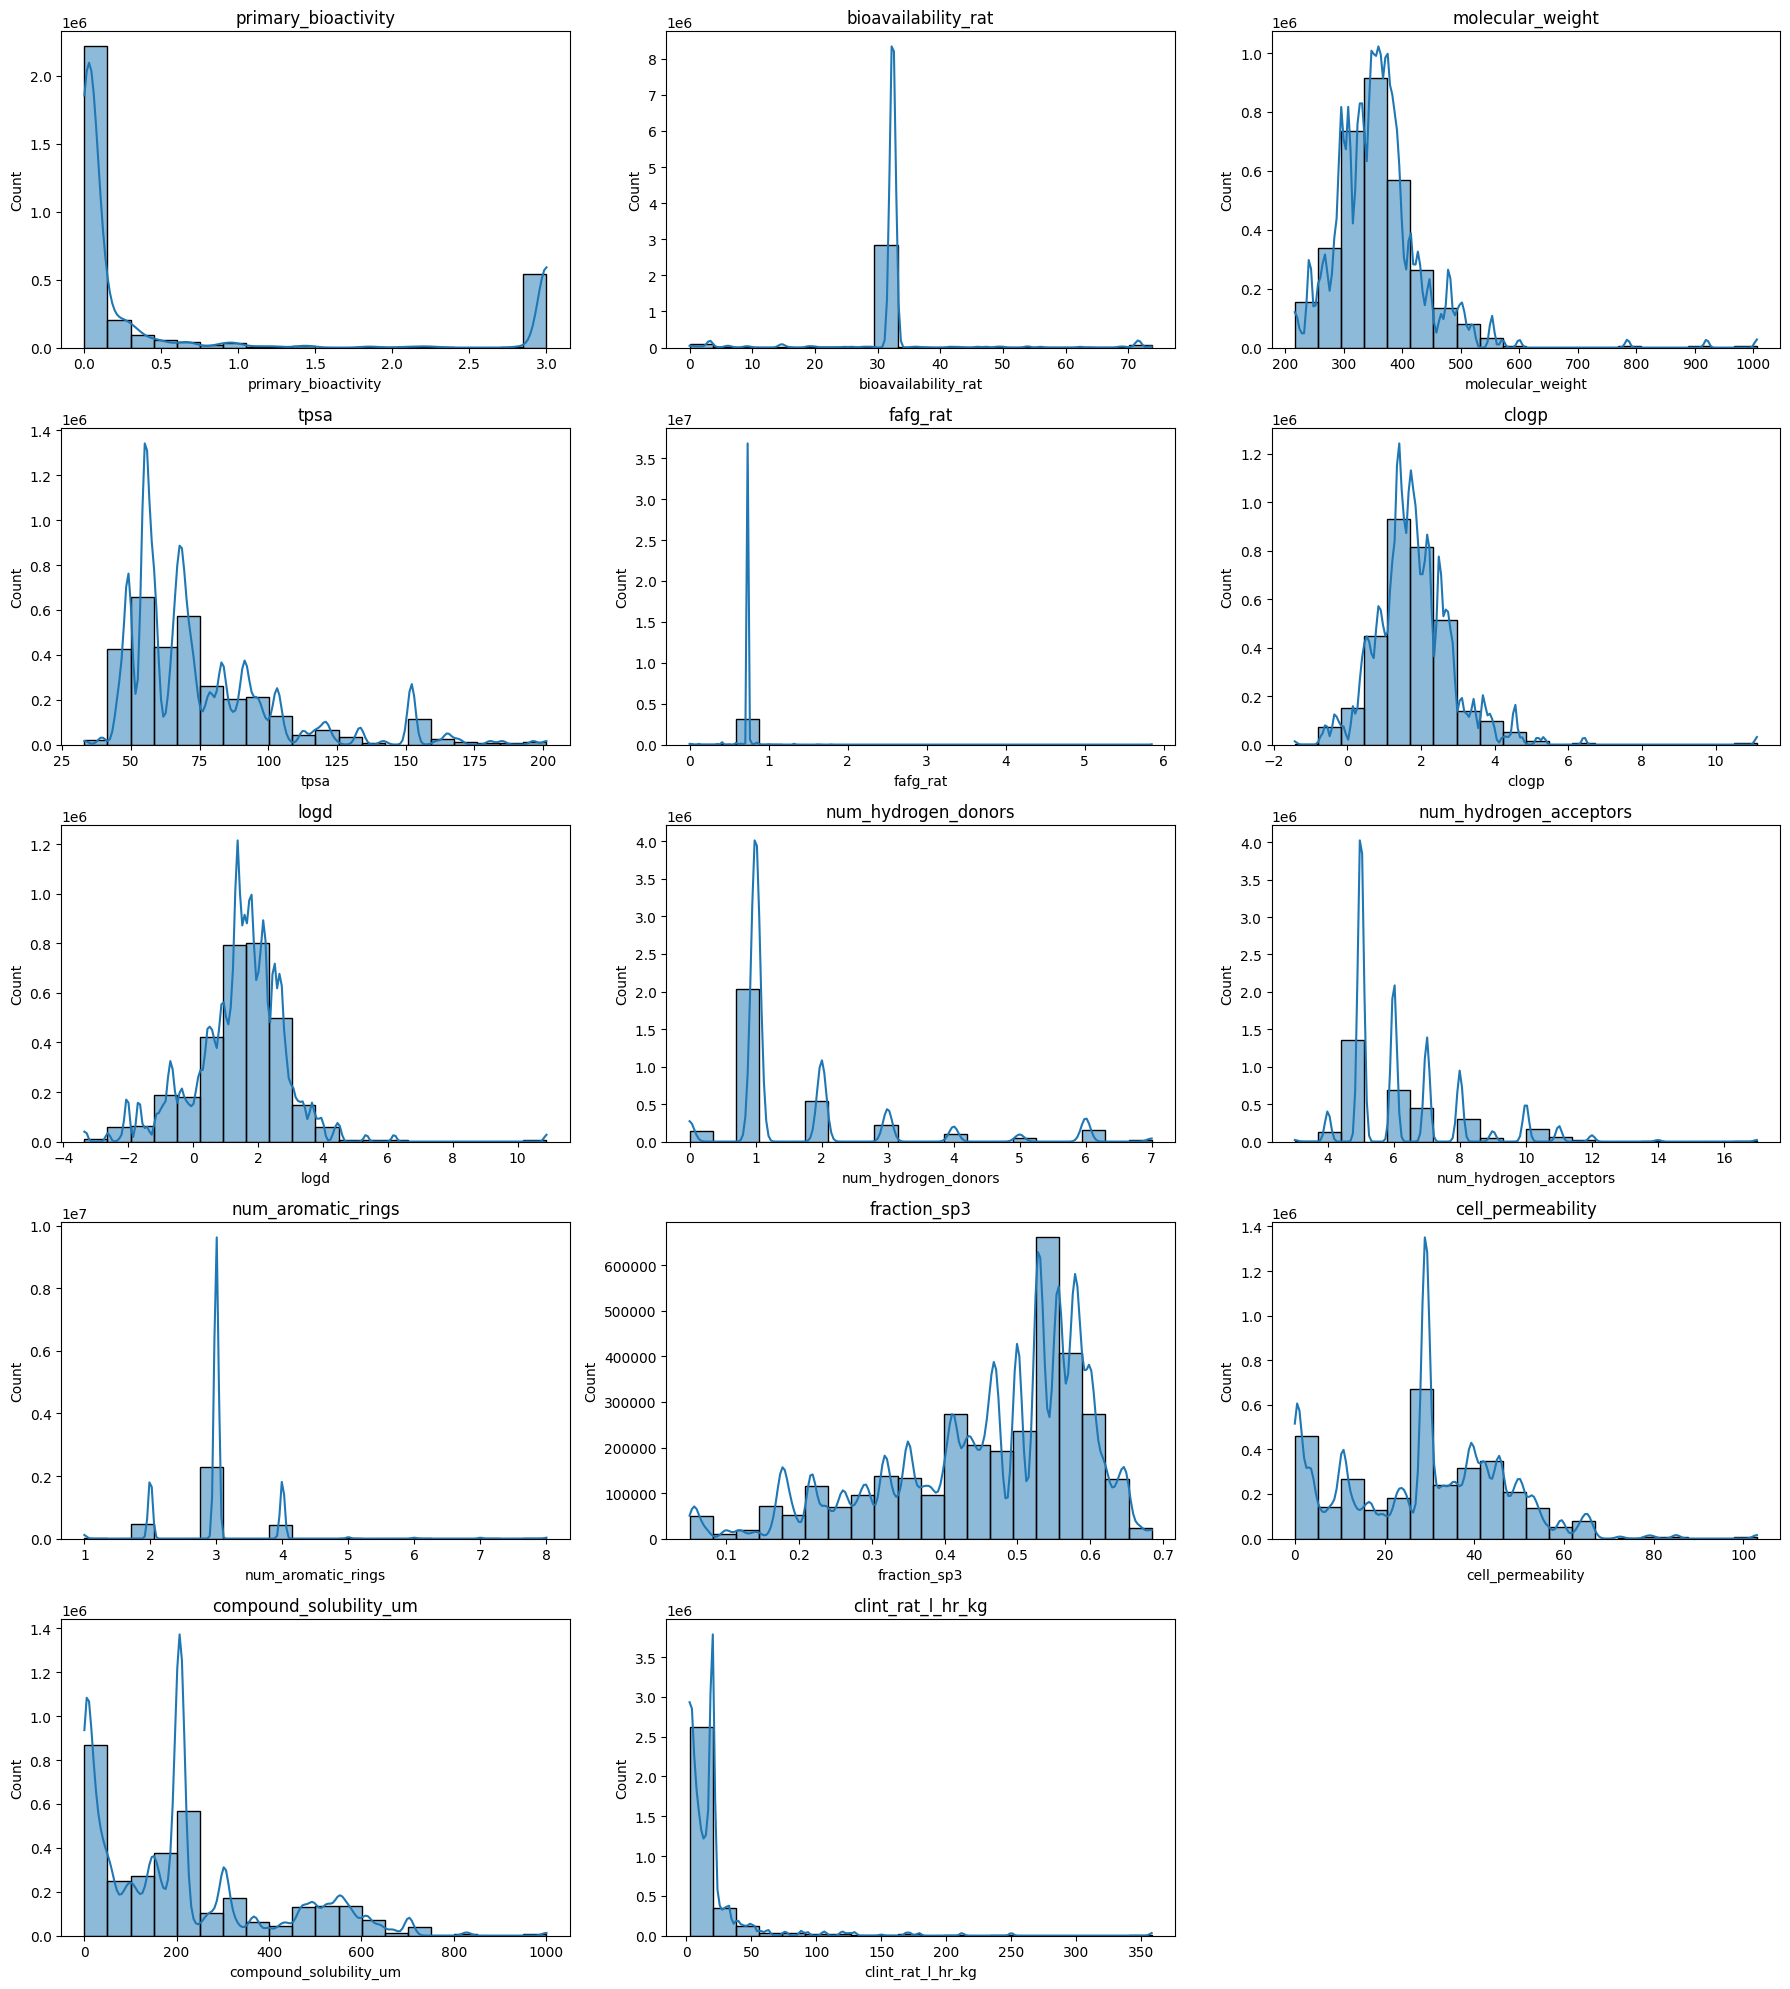

In [15]:
# Plotting the distributions of numerical variables
selected_columns = [
    'primary_bioactivity', 'bioavailability_rat', 'molecular_weight',
    'tpsa', 'fafg_rat', 'clogp', 'logd', 'num_hydrogen_donors',
    'num_hydrogen_acceptors', 'num_aromatic_rings', 'fraction_sp3',
    'cell_permeability', 'compound_solubility_um', 'clint_rat_l_hr_kg'
]

# Function to create histograms with refined bin sizes
def plot_histograms_with_bins(data, columns):

    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        # Plot histogram with refined bin sizes
        sns.histplot(data[col].dropna(), kde=True, ax=ax, bins=20)
        ax.set_title(col)

        # Label axes
        ax.set_xlabel(col)
        ax.set_ylabel('Count')

    # Removing any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Calling the function
plot_histograms_with_bins(cleaned_merged_data, selected_columns)


In [16]:
# Define the categories and associated keywords
categories = {
    "Cardiovascular": ["chest", "heart", "cardiac", "hypertension", "blood pressure", "tachycardia", "bradycardia", "arrhythmia", "myocardial", "infarction", "angina", "stroke", "atherosclerosis", "heart failure", "cardiomyopathy", "ischemia", "palpitations", "vascular", "hypertensive", "coronary", "thrombosis", "embolism"],
    "Gastrointestinal": ["stomach", "abdominal", "vomit", "nausea", "diarrhea", "constipation", "gastro", "colitis", "gastritis", "ulcer", "reflux", "esophagitis", "irritable bowel", "crohn", "celiac", "bloating", "intestinal", "digestive", "pancreatitis", "hepatobiliary"],
    "Neurological": ["headache", "migraine", "dizziness", "seizure", "neuropathy", "tremor", "neurological"],
    "Dermatological": ["rash", "skin", "dermatitis", "eczema", "psoriasis", "dermato"],
    "Haematological": ["anemia", "leukopenia", "thrombocytopenia", "blood", "haemato", "haemo", "hemo"],
    "Renal": ["kidney", "renal", "nephro", "nephritis", "nephropathy", "glomerulonephritis", "renal failure", "dialysis", "uremia", "creatinine", "proteinuria", "hematuria", "pyelonephritis", "renal calculi", "kidney stones", "glomerular", "tubular"],
    "Respiratory": ["lung", "asthma", "respiratory", "bronchitis"],
    "Musculoskeletal": ["muscle", "bone", "arthritis", "myalgia", "osteoporosis", "musculoskeletal"],
    "Endocrinology": ["diabetes", "thyroid", "endocrine", "hormone"],
    "Hepatology": ["liver", "hepato", "hepatitis", "cirrhosis", "hepatocellular", "jaundice", "liver failure", "fibrosis", "steatosis", "hepatomegaly", "bilirubin", "hepatotoxicity", "cholestasis", "portal hypertension", "ascites", "hepatic", "transaminase"],
    "General": ["pain", "fatigue", "fever", "weakness", "general"],
    "Urology": ["urine", "urinary", "urology", "bladder"],
    "Reproductive": ["pregnancy", "fertility", "reproductive"],
    "Immunological": ["allergy", "immune", "cytokine", "hypersensitivity"],
    "Oncology": ["cancer", "tumor", "neoplasm", "carcinoma", "sarcoma", "leukemia", "lymphoma", "melanoma", "oncology", "metastasis", "chemotherapy", "radiotherapy", "immunotherapy", "biopsy", "oncogene", "cytotoxic", "adenocarcinoma"],
    "Psychological": ["anxiety", "depression", "suicidial", "ptsd", "bipolar", "psycho", "mood", "sleep", "insomnia", "food"]
}

# Function to map adverse events to categories
def map_adverse_event_to_category(adverse_event, categories):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in adverse_event.lower():
                return category
    return "Other"  # Return "Other" if no category matches

# Apply the mapping function to the adverse event column
cleaned_merged_data['adverse_event_category'] = cleaned_merged_data['adverse_event'].apply(lambda x: map_adverse_event_to_category(x, categories))

# Display the first few rows of the updated dataframe
cleaned_merged_data.head()



,compoundid,gene_symbol,pic50,primary_bioactivity,molecular_weight,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,...,compound_solubility_um,fafg_rat,bioavailability_rat,clint_rat_l_hr_kg,ensembl_id,entrez_gene,adverse_event,drugs_with_ae,bioactive_drugs,adverse_event_category
1492848,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,209.382263,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Shock haemorrhagic,151,21,Haematological
1492849,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,209.382263,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Abdominal pain,1991,21,Gastrointestinal
1492850,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,209.382263,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Gastrointestinal ulcer,115,151,Gastrointestinal
1492851,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,209.382263,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Myoclonus,268,21,Other
1492852,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,209.382263,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Insomnia,1647,8,Psychological


In [17]:
# Encoding categorical data
cleaned_merged_data["adverse_event_category_encoded"] = cleaned_merged_data["adverse_event_category"].astype('category').cat.codes
cleaned_merged_data.head()


,compoundid,gene_symbol,pic50,primary_bioactivity,molecular_weight,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,...,fafg_rat,bioavailability_rat,clint_rat_l_hr_kg,ensembl_id,entrez_gene,adverse_event,drugs_with_ae,bioactive_drugs,adverse_event_category,adverse_event_category_encoded
1492848,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Shock haemorrhagic,151,21,Haematological,5
1492849,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Abdominal pain,1991,21,Gastrointestinal,3
1492850,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Gastrointestinal ulcer,115,151,Gastrointestinal,3
1492851,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Myoclonus,268,21,Other,11
1492852,CM-212452,EGFR,5.35,3.0,294.3,93.35,2.482,2.4436,3,5,...,0.738619,32.396558,20.016021,ENSG00000146648,1956.0,Insomnia,1647,8,Psychological,12


**Handling Duplicated Values**

In [18]:
#  Checking for duplicated values
duplicate_sum = cleaned_merged_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')


Duplicates Rows in Dataset are : 320480


In [19]:
# Removing duplicates in the dataset

duplicated = cleaned_merged_data[cleaned_merged_data.duplicated(keep=False)]
cleaned_merged_data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(cleaned_merged_data.shape[0], cleaned_merged_data.shape[1]))
duplicated.head()


Total 2930016 datapoints remaining with 25 features


,compoundid,gene_symbol,pic50,primary_bioactivity,molecular_weight,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,...,fafg_rat,bioavailability_rat,clint_rat_l_hr_kg,ensembl_id,entrez_gene,adverse_event,drugs_with_ae,bioactive_drugs,adverse_event_category,adverse_event_category_encoded
1527840,CM-1116691,EGFR,5.35,0.271,241.29,58.87,1.314,1.3136,1,5,...,0.738619,32.396558,5.54,ENSG00000146648,1956.0,Shock haemorrhagic,151,21,Haematological,5
1527841,CM-1116691,EGFR,5.35,0.271,241.29,58.87,1.314,1.3136,1,5,...,0.738619,32.396558,5.54,ENSG00000146648,1956.0,Abdominal pain,1991,21,Gastrointestinal,3
1527842,CM-1116691,EGFR,5.35,0.271,241.29,58.87,1.314,1.3136,1,5,...,0.738619,32.396558,5.54,ENSG00000146648,1956.0,Gastrointestinal ulcer,115,151,Gastrointestinal,3
1527843,CM-1116691,EGFR,5.35,0.271,241.29,58.87,1.314,1.3136,1,5,...,0.738619,32.396558,5.54,ENSG00000146648,1956.0,Myoclonus,268,21,Other,11
1527844,CM-1116691,EGFR,5.35,0.271,241.29,58.87,1.314,1.3136,1,5,...,0.738619,32.396558,5.54,ENSG00000146648,1956.0,Insomnia,1647,8,Psychological,12


In [20]:
# Confirming there are no longer duplicated values

duplicate_sum = cleaned_merged_data.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')


Dataset contains no Duplicate Values



**Handling Outliers**

**Visualizing The Variables Before Outliers Filtration**

In [21]:
# Checking for Outliers

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))

outliers(cleaned_merged_data[[
    'pic50', 'primary_bioactivity', 'molecular_weight',
    'cell_permeability', 'compound_solubility_um',
    'clint_rat_l_hr_kg'
]])

num_columns = [
    'pic50', 'primary_bioactivity', 'molecular_weight',
    'cell_permeability', 'compound_solubility_um',
    'clint_rat_l_hr_kg'
]


For the feature pic50, No of Outliers is 339184
For the feature primary_bioactivity, No of Outliers is 543536
For the feature molecular_weight, No of Outliers is 101040
For the feature cell_permeability, No of Outliers is 13472
For the feature compound_solubility_um, No of Outliers is 36528
For the feature clint_rat_l_hr_kg, No of Outliers is 240416


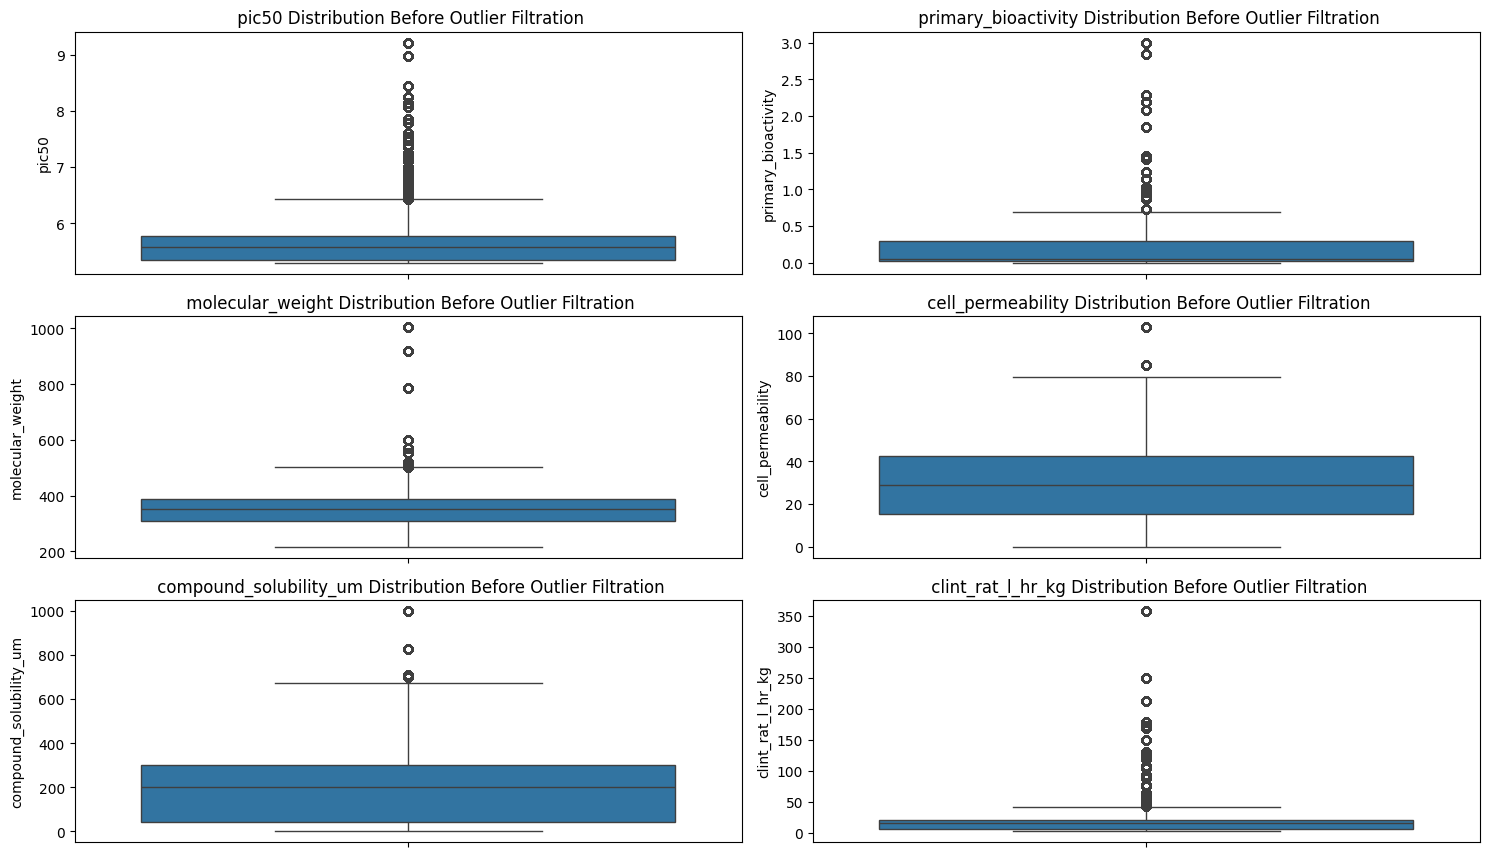

In [22]:
# Visualizing the Outliers using Boxplots

selected_columns = [
    'pic50', 'primary_bioactivity', 'molecular_weight',
    'cell_permeability', 'compound_solubility_um',
    'clint_rat_l_hr_kg'
]

plt.figure(figsize=(15, 20))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(cleaned_merged_data[column])
    plt.title(f' {column} Distribution Before Outlier Filtration')

plt.tight_layout()
plt.show()


In [23]:
# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


# Remove outliers for each numerical column
for column in selected_columns:
    cleaned_merged_data = remove_outliers_iqr(cleaned_merged_data, column)

# Check the data after removing outliers
cleaned_merged_data.describe()


,pic50,primary_bioactivity,molecular_weight,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,num_aromatic_rings,fraction_sp3,cell_permeability,compound_solubility_um,fafg_rat,bioavailability_rat,clint_rat_l_hr_kg,entrez_gene,drugs_with_ae,bioactive_drugs,adverse_event_category_encoded
count,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06,1.837392e+06
mean,5.535138e+00,8.154316e-02,3.442310e+02,6.602123e+01,1.665093e+00,1.343814e+00,1.270871e+00,5.755279e+00,2.949363e+00,5.045584e-01,3.186794e+01,2.144930e+02,7.473352e-01,3.233203e+01,1.305419e+01,3.281581e+03,3.413538e+02,8.958638e+01,9.126124e+00
std,2.567087e-01,1.108204e-01,4.685185e+01,1.728811e+01,8.631128e-01,1.149860e+00,7.034015e-01,1.197743e+00,5.223112e-01,1.042288e-01,1.723346e+01,1.931597e+02,2.277597e-01,7.784352e+00,8.974512e+00,1.577553e+03,4.019820e+02,6.981779e+01,3.745807e+00
min,5.300000e+00,3.050000e-03,2.262800e+02,3.309000e+01,-1.429000e+00,-3.319200e+00,0.000000e+00,3.000000e+00,1.000000e+00,5.556000e-02,0.000000e+00,8.200000e-01,0.000000e+00,0.000000e+00,2.500000e+00,1.956000e+03,2.300000e+01,2.000000e+00,0.000000e+00
25%,5.348000e+00,1.890000e-02,3.103900e+02,5.521000e+01,1.169000e+00,7.472000e-01,1.000000e+00,5.000000e+00,3.000000e+00,4.666700e-01,1.730000e+01,4.200000e+01,7.386187e-01,3.239656e+01,5.260000e+00,1.956000e+03,6.700000e+01,8.000000e+00,8.000000e+00
50%,5.350000e+00,3.520000e-02,3.483800e+02,5.887000e+01,1.654000e+00,1.480600e+00,1.000000e+00,5.000000e+00,3.000000e+00,5.294100e-01,3.370000e+01,1.780000e+02,7.386187e-01,3.239656e+01,1.160000e+01,1.956000e+03,1.790000e+02,1.510000e+02,1.100000e+01
75%,5.710000e+00,8.560000e-02,3.734700e+02,7.228000e+01,2.137000e+00,2.086900e+00,1.000000e+00,6.000000e+00,3.000000e+00,5.789500e-01,4.470000e+01,3.080000e+02,7.386187e-01,3.239656e+01,1.980000e+01,5.159000e+03,4.630000e+02,1.530000e+02,1.100000e+01
max,6.428000e+00,6.260000e-01,4.534800e+02,1.335500e+02,4.565000e+00,4.477000e+00,5.000000e+00,1.000000e+01,4.000000e+00,6.842100e-01,8.500000e+01,7.050000e+02,5.850000e+00,7.370000e+01,4.120000e+01,5.159000e+03,2.457000e+03,1.530000e+02,1.600000e+01


**Visualizing The Variables After Outliers Filtration**

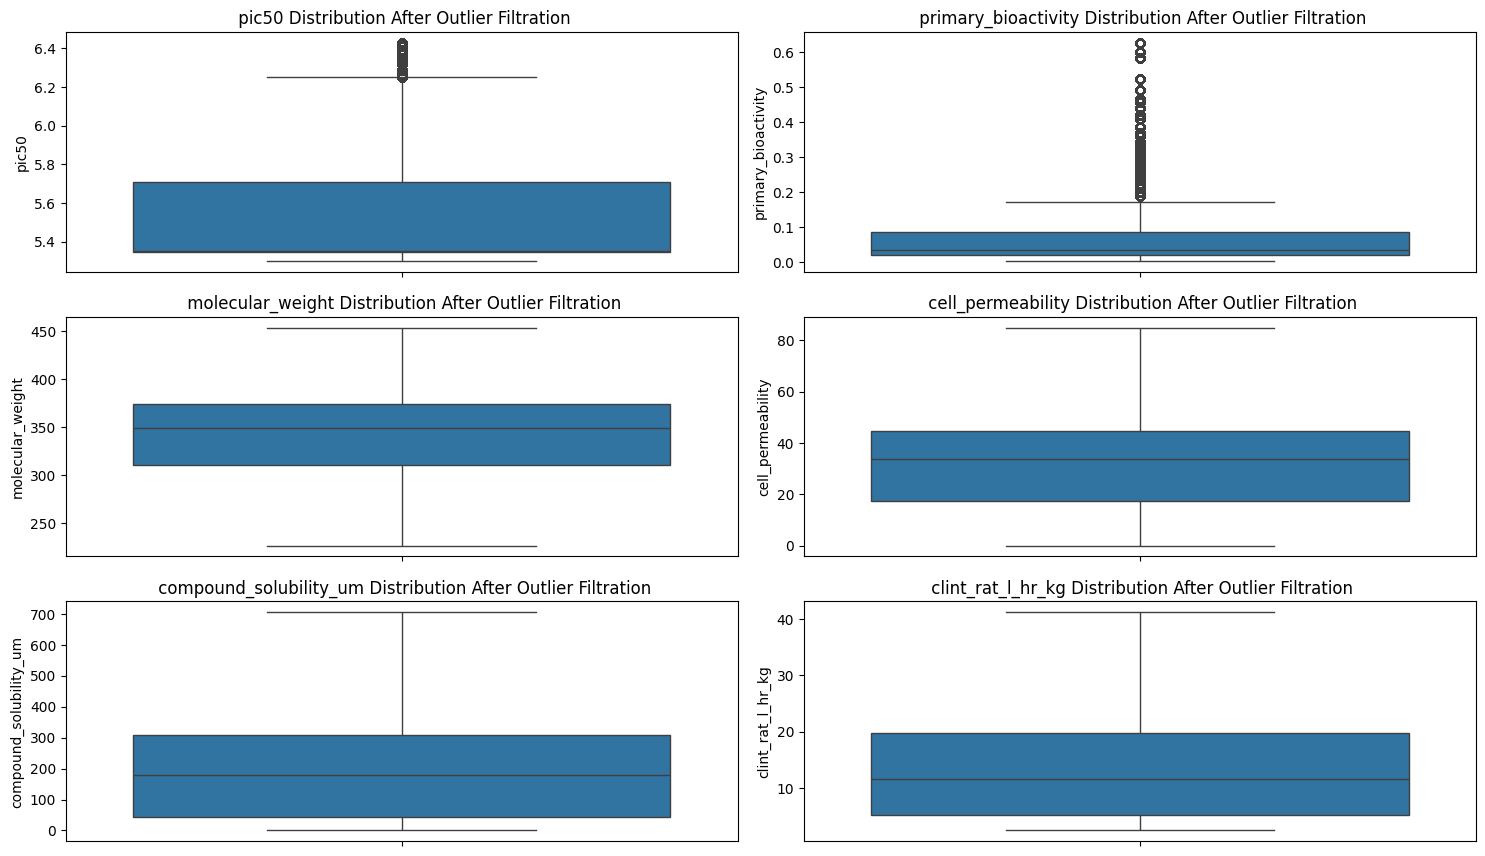

In [24]:
# Visualizing the datset using Boxplots

plt.figure(figsize=(15, 20))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(cleaned_merged_data[column])
    plt.title(f' {column} Distribution After Outlier Filtration')

plt.tight_layout()
plt.show()


In [25]:
# Verifying there no more Outliers

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))

outliers(cleaned_merged_data[[
    'pic50', 'primary_bioactivity', 'molecular_weight',
    'cell_permeability', 'compound_solubility_um',
    'clint_rat_l_hr_kg'
]])


For the feature pic50, No of Outliers is 56960
For the feature primary_bioactivity, No of Outliers is 234992
For the feature molecular_weight, No of Outliers is 0
For the feature cell_permeability, No of Outliers is 0
For the feature compound_solubility_um, No of Outliers is 0
For the feature clint_rat_l_hr_kg, No of Outliers is 0


In [26]:
processed_dataset = cleaned_merged_data.to_csv('processed_dataset.csv', index=None)

# EXPLORATORY DATA ANALYSIS


**Overview of the Dataset**


**Variables of Interest:**

*   **genesymbol**: The official symbol assigned to a gene
*   **adverse_event**: Any unwanted or harmful effect after taking a drug or compound.
*   **adverse_event_category**: Groups the adverse events into larger categories based on the system they affect in the body.
*   **adverse_event_category_encoded**: A number assigned to each adverse event category to make it easier to analyze.
*   **compoundid**: A unique code given to a specific chemical compound or drug being studied.
*   **pic50**: A measure of how effectively a compound can stop a particular biological or biochemical function. Higher numbers mean the compound is more effective.
*   **primary_bioactivity**: A measure of the biological activity of a compound measured in an assay that targets its primary biological function. This shows how well the compound stops a specific biological process in this test.
*   **molecular_weight**: The total weight of a compound molecule, calculated by adding up the weights of all its atoms.
*   **cell_permeability**: A measure of how easily a compound can pass through cell membranes. High permeability means the compound can easily be absorbed by cells.
*   **compound_solubility_um**: A measure of how much a compound can dissolve in a given solvent. Higher solubility means the compound can dissolve more easily and be absorbed by cells.
*   **fafg_rat**: The percentage of a compound absorbed from the gut into the bloodstream.
*   **bioavailability_rat**: The proportion of a compound that reaches the bloodstream after it is introduced into the body. A measure of how much of the compound is available to work.
*   **clint_mic_l_hr_kg_rat**: The rate at which a compound is broken down and eliminated from the body by the liver.


In [27]:
cleaned_merged_data.shape

(1837392, 25)

In [28]:
# Overview of the dataset
cleaned_merged_data.head()

,compoundid,gene_symbol,pic50,primary_bioactivity,molecular_weight,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,...,fafg_rat,bioavailability_rat,clint_rat_l_hr_kg,ensembl_id,entrez_gene,adverse_event,drugs_with_ae,bioactive_drugs,adverse_event_category,adverse_event_category_encoded
1512288,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Shock haemorrhagic,151,21,Haematological,5
1512289,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Abdominal pain,1991,21,Gastrointestinal,3
1512290,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Gastrointestinal ulcer,115,151,Gastrointestinal,3
1512291,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Myoclonus,268,21,Other,11
1512292,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Insomnia,1647,8,Psychological,12


In [29]:
# Determining Compound distribution
cleaned_merged_data['compoundid'].value_counts()


CM-1771635    15552
CM-1337435    15552
CM-1240231    13472
CM-1413612    13472
CM-2006735    13472
              ...  
CM-1327607     2848
CM-1321728     2848
CM-1320304     2848
CM-1307015     2848
CM-2166641     2848
Name: compoundid, Length: 341, dtype: int64

In [30]:
# Determining Target Gene distribution
cleaned_merged_data['gene_symbol'].value_counts()

EGFR      1076976
PDGFRB     760416
Name: gene_symbol, dtype: int64

In [31]:
# Determining Adverse Event Category distribution
cleaned_merged_data['adverse_event_category'].value_counts()

Other               1186847
Haematological       101938
Cardiovascular        95727
Gastrointestinal      71464
Dermatological        63581
Hepatology            54273
Respiratory           37142
Musculoskeletal       36598
General               36498
Oncology              36351
Renal                 31899
Psychological         22097
Neurological          16924
Endocrinology         14154
Immunological         13116
Urology               12492
Reproductive           6291
Name: adverse_event_category, dtype: int64

In [32]:
# Determining Bioavailability distribution
cleaned_merged_data['bioavailability_rat'].describe()

count    1.837392e+06
mean     3.233203e+01
std      7.784352e+00
min      0.000000e+00
25%      3.239656e+01
50%      3.239656e+01
75%      3.239656e+01
max      7.370000e+01
Name: bioavailability_rat, dtype: float64

In [33]:
# Determining Log of Fraction Absorbed distribution
cleaned_merged_data['fafg_rat'].describe()

count    1.837392e+06
mean     7.473352e-01
std      2.277597e-01
min      0.000000e+00
25%      7.386187e-01
50%      7.386187e-01
75%      7.386187e-01
max      5.850000e+00
Name: fafg_rat, dtype: float64

In [34]:
# Determining Clearance distribution
cleaned_merged_data['clint_rat_l_hr_kg'].describe()

count    1.837392e+06
mean     1.305419e+01
std      8.974512e+00
min      2.500000e+00
25%      5.260000e+00
50%      1.160000e+01
75%      1.980000e+01
max      4.120000e+01
Name: clint_rat_l_hr_kg, dtype: float64

In [35]:
# Determining compound solubility distribution
cleaned_merged_data['compound_solubility_um'].describe()

count    1.837392e+06
mean     2.144930e+02
std      1.931597e+02
min      8.200000e-01
25%      4.200000e+01
50%      1.780000e+02
75%      3.080000e+02
max      7.050000e+02
Name: compound_solubility_um, dtype: float64

In [36]:
# Determining cell permeability distribution
cleaned_merged_data['cell_permeability'].describe()

count    1.837392e+06
mean     3.186794e+01
std      1.723346e+01
min      0.000000e+00
25%      1.730000e+01
50%      3.370000e+01
75%      4.470000e+01
max      8.500000e+01
Name: cell_permeability, dtype: float64

In [37]:
# Determining pIC50 distribution
cleaned_merged_data['pic50'].describe()

count    1.837392e+06
mean     5.535138e+00
std      2.567087e-01
min      5.300000e+00
25%      5.348000e+00
50%      5.350000e+00
75%      5.710000e+00
max      6.428000e+00
Name: pic50, dtype: float64

In [38]:
# Determining bioactivity distribution
cleaned_merged_data['primary_bioactivity'].describe()

count    1.837392e+06
mean     8.154316e-02
std      1.108204e-01
min      3.050000e-03
25%      1.890000e-02
50%      3.520000e-02
75%      8.560000e-02
max      6.260000e-01
Name: primary_bioactivity, dtype: float64

In [39]:
# Determining Log of Fraction Absorbed distribution
cleaned_merged_data['molecular_weight'].describe()

count    1.837392e+06
mean     3.442310e+02
std      4.685185e+01
min      2.262800e+02
25%      3.103900e+02
50%      3.483800e+02
75%      3.734700e+02
max      4.534800e+02
Name: molecular_weight, dtype: float64

# DATA ANALYSIS AND VISUALIZATION

**Relationship Between Physicochemical Properties vs Clearance/Bioavailability**

Physicochemical properties: molecular_weight

Clearance: clint_rat_l_hr_kg

Bioavailability: bioavailability_rat

**Correlation Matrix**

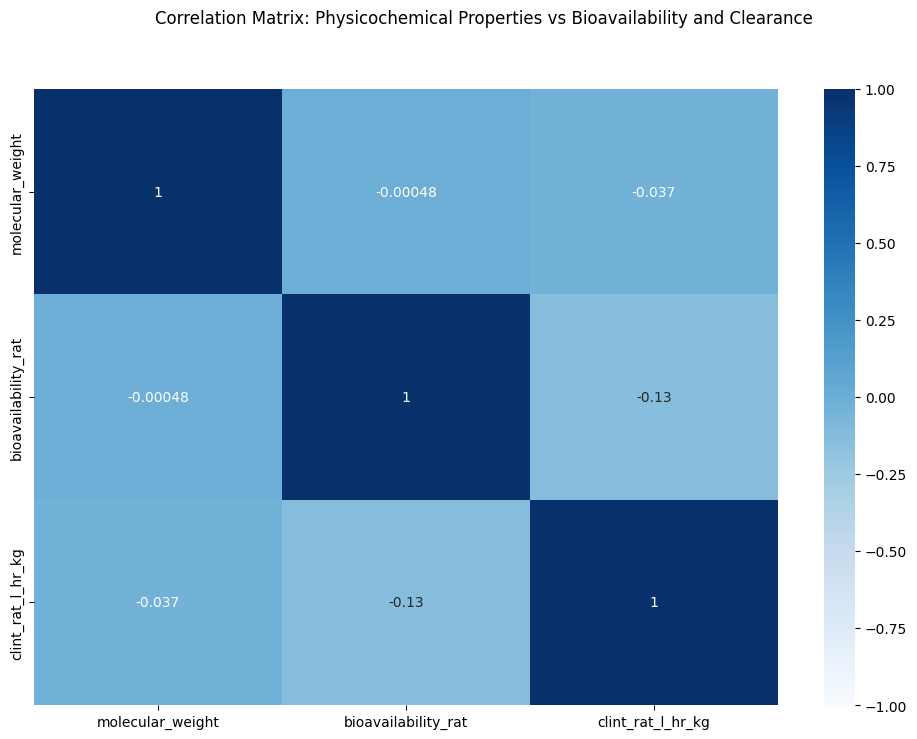

In [40]:
# Selecting relevant columns

selected_columns = [
    'molecular_weight',
    'bioavailability_rat',
    'clint_rat_l_hr_kg'
]

data_physico_cl = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_physico_cl.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.suptitle('Correlation Matrix: Physicochemical Properties vs Bioavailability and Clearance')
plt.show()



**Relationship Between Primary Potency and Selectivity (Off-Target Bioactivity)**

Primary Potency: primary_bioactivity

Selectivity (off-target bioactivity): pic50

**Correlation Matrix**

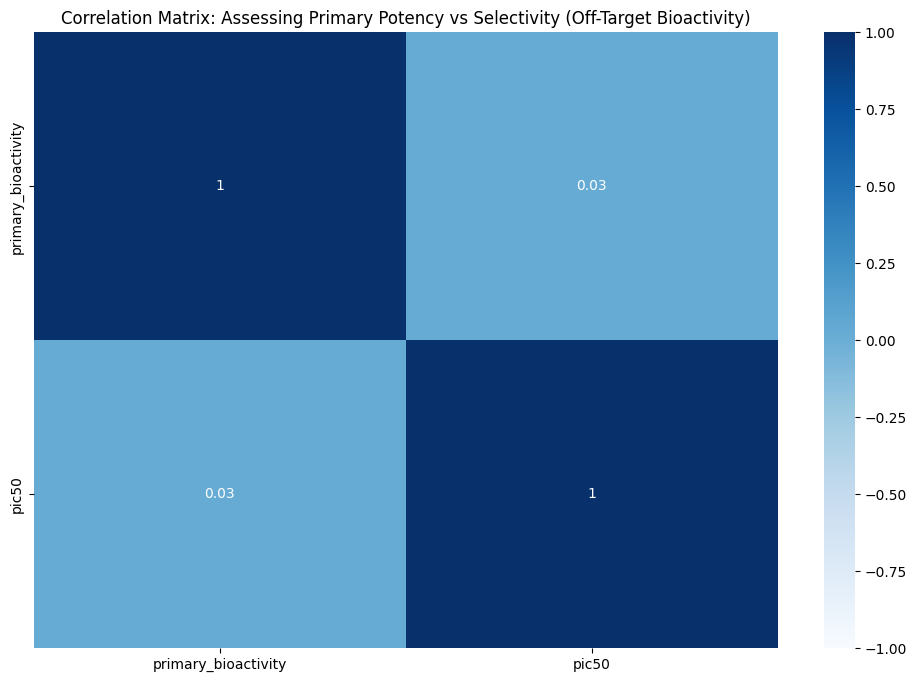

In [41]:

# Selecting relevant columns
columns = ['primary_bioactivity', 'pic50']
data_pry_pot_off = cleaned_merged_data[columns]

# Calculate the correlation matrix
correlation_matrix = data_pry_pot_off.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Assessing Primary Potency vs Selectivity (Off-Target Bioactivity)')
plt.show()


**Relationship Between Selectivity and Adverse Events**

Selectivity (off-target bioactivity): pic50

Adverse Event: adverse_event_category_encoded

**Correlation Matrix**

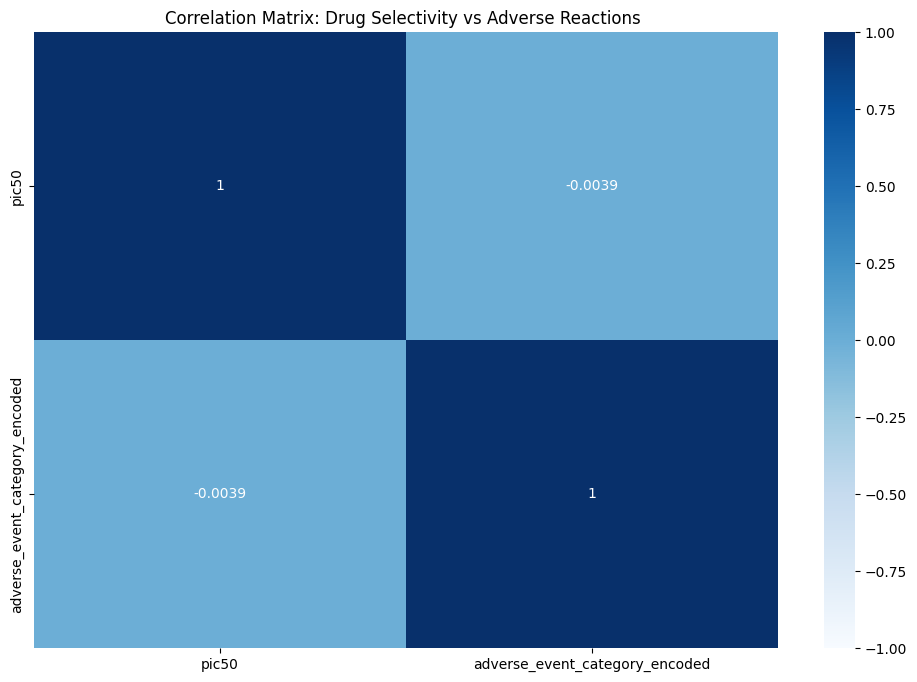

In [42]:
# Selecting relevant columns
columns = ['pic50', 'adverse_event_category_encoded']
data_pry_sel_ae = cleaned_merged_data[columns]

# Calculate the correlation matrix
correlation_matrix = data_pry_sel_ae.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Drug Selectivity vs Adverse Reactions ')
plt.show()


**Relationship Between In Vitro and In Vivo Properties**

In Vitro Properties: primary_bioactivity

In Vivo Properties: clint_rat_l_hr_kg

**Correlation Matrix**

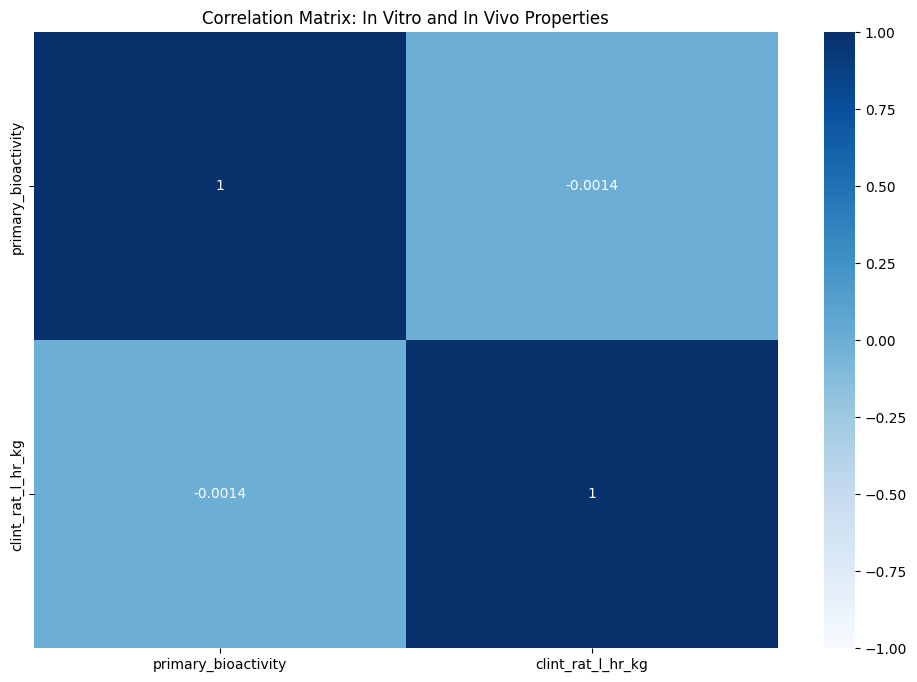

In [43]:
# Selecting relevant columns

selected_columns = ['primary_bioactivity', 'clint_rat_l_hr_kg']
data_vivo_vitro = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_vivo_vitro.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: In Vitro and In Vivo Properties')
plt.show()



**Data Relationships for Absorption Rate**

Given that compound solubility and molecular weight of the drug affect absorption rate, these relationships will be explored.

Physicochemical properties: molecular_weight, compound_solubility_um

Fractional Absorption: fafg_rat

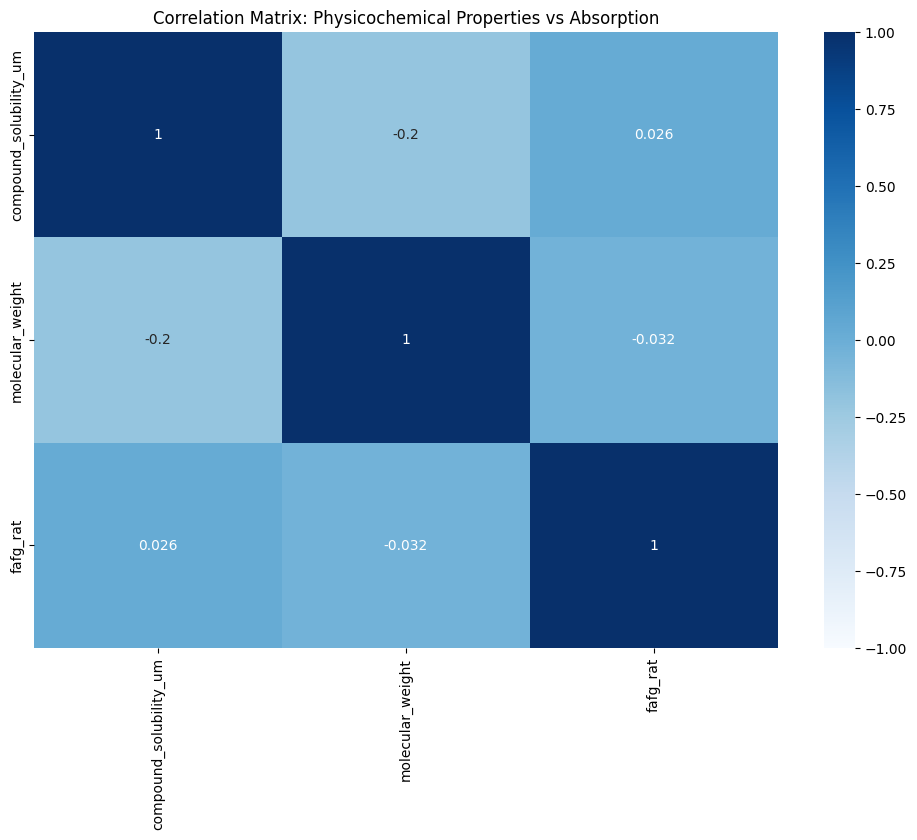

In [44]:
# Selecting relevant columns

selected_columns = ['compound_solubility_um', 'molecular_weight', 'fafg_rat']
data_absorption = cleaned_merged_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data_absorption.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Physicochemical Properties vs Absorption')
plt.xticks(rotation='vertical')
plt.show()



In [45]:
cleaned_merged_data.head()

,compoundid,gene_symbol,pic50,primary_bioactivity,molecular_weight,tpsa,clogp,logd,num_hydrogen_donors,num_hydrogen_acceptors,...,fafg_rat,bioavailability_rat,clint_rat_l_hr_kg,ensembl_id,entrez_gene,adverse_event,drugs_with_ae,bioactive_drugs,adverse_event_category,adverse_event_category_encoded
1512288,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Shock haemorrhagic,151,21,Haematological,5
1512289,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Abdominal pain,1991,21,Gastrointestinal,3
1512290,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Gastrointestinal ulcer,115,151,Gastrointestinal,3
1512291,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Myoclonus,268,21,Other,11
1512292,CM-974218,EGFR,5.35,0.368,289.33,72.52,2.861,2.8614,3,5,...,0.855,18.8,20.016021,ENSG00000146648,1956.0,Insomnia,1647,8,Psychological,12
